In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import pickle
def save_data(data, outfile):
    with open(outfile, 'wb') as outf:
        pickle.dump(data, outf)

def load_data(infile):
    with open(infile, 'rb') as inf:
        data = pickle.load(inf)
    return data


In [3]:
#https://annovar.openbioinformatics.org/en/latest/user-guide/gene/
dict_gene1 = {
    'downstream':5,
    'exonic':1,
    'exonic;splicing':1,
    #'Func.refGene',
    'intergenic':6,
    'intronic':4,
    'ncRNA_exonic':2.1,
    'ncRNA_splicing':2.1,
    'ncRNA_intronic':2.4,
    'ncRNA_exonic;splicing':2.1,
    'ncRNA_UTR5':2.3,
    'splicing':1,
    'upstream':5,
    'upstream;downstream':5,
    'UTR3':3,
    'UTR5':3,
    'UTR5;UTR3':3
}
dict_gene2={
    '.':12,
    #'ExonicFunc.refGene',
    'frameshift_deletion':2,
    'frameshift_insertion':1,
    'nonframeshift_deletion':7,
    'nonframeshift_insertion':6,
    'stopgain':4,
    'stoploss':5,
    'startloss':0, ##add
    'unknown':11
}

In [4]:
tag_list=['Pathogenic','Likely_pathogenic','Pathogenic/Likely_pathogenic',
         'Benign','Likely_benign','Benign/Likely_benign']


In [5]:
#https://www.ncbi.nlm.nih.gov/clinvar/docs/review_status/
dict_CLNREVSTAT={
    'criteria_provided,_single_submitter':1,
    'no_assertion_criteria_provided':0,
    'criteria_provided,_multiple_submitters,_no_conflicts':2,
    'reviewed_by_expert_panel':3,
    'practice_guideline':4
}

In [6]:
columns_list=['# [1]CHROM_[2]POS_[3]REF_[4]ALT',  '[9]Func.refGene',
       '[10]ExonicFunc.refGene', '[11]controls_AF_popmax', '0', 
       'exonic', 'stream', 'intergenic', 'intronic', 'ncRNA', 'splicing',
       'UTR', 'frameshift_deletion', 'frameshift_insertion',
       'nonframeshift_deletion', 'nonframeshift_insertion', 'startloss',
       'stopgain', 'stoploss',  'exac_syn_z', 'exac_mis_z',
       'exac_lof_z', 'exac_pLI', 'exac_cnv_z', 
       'RVIS[pop_maf_0.05%(any)]', '%RVIS[pop_maf_0.05%(any)]',
        'OE-ratio_[ExAC v2]',
       '%OE-ratio_[ExAC v2]', 'alternative-RVIS[maf_0.0025%]',
       'alternative-%RVIS[maf_0.0025%]']
rename_col=['INDEL_index',  'Func',
       'ExonicFunc', 'gnomad_genome_controls_AF_popmax', 'length', 
       'exonic', 'stream', 'intergenic', 'intronic', 'ncRNA', 'splicing',
       'UTR', 'frameshift_deletion', 'frameshift_insertion',
       'nonframeshift_deletion', 'nonframeshift_insertion', 'startloss',
       'stopgain', 'stoploss',  'exac_syn_z', 'exac_mis_z',
       'exac_lof_z', 'exac_pLI', 'exac_cnv_z', 
       'RVIS_pop_maf_0_05', 'p_RVIS_pop_maf_0_05',
        'OE-ratio_ExAC_v2',
       'p_OE-ratio_ExAC_v2', 'alternative-RVIS_maf_0_0025',
       'alternative-p_RVIS_maf_0_0025']

### statistics

In [7]:
data_dir='/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project/project/variang_predict2/INDELpred_0124/train_test_data/statistics/'
f_train_data_f='id_sig_func.out2'
f_train_data=pd.read_csv(os.path.join(data_dir, f_train_data_f),sep='\t',header=0)
p_list=['Pathogenic','Likely_pathogenic','Pathogenic/Likely_pathogenic']
b_list=['Benign','Likely_benign','Benign/Likely_benign']
f_train_data.loc[f_train_data['[2]CLNSIG'].isin(p_list),'tag']=1
f_train_data.loc[f_train_data['[2]CLNSIG'].isin(b_list),'tag']=0 
f_train_data['tag'].fillna(-9, inplace=True)

In [8]:
func_sta=pd.concat([
    pd.DataFrame(f_train_data[f_train_data['tag']==0]['[3]Func.refGene'].value_counts()),
    pd.DataFrame(f_train_data[f_train_data['tag']==1]['[3]Func.refGene'].value_counts()),
    pd.DataFrame(f_train_data[f_train_data['tag']==-9]['[3]Func.refGene'].value_counts()),
],axis=1)
func_sta.columns=['benign','pathogenic','other']
for column in func_sta.columns:
    func_sta[column].fillna(0, inplace=True)
#func_sta['all']=func_sta['benign']+func_sta['pathogenic']+func_sta['other']
#func_sta

In [9]:
func_sta

,benign,pathogenic,other
intronic,5765.0,369.0,2540.0
exonic,1891.0,46408.0,14333.0
UTR3,1523.0,203.0,3397.0
UTR5,394.0,39.0,686.0
ncRNA_intronic,206.0,5.0,144.0
splicing,197.0,872.0,478.0
ncRNA_exonic,61.0,35.0,86.0
upstream,27.0,96.0,71.0
downstream,26.0,4.0,8.0
intergenic,18.0,76.0,66.0


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


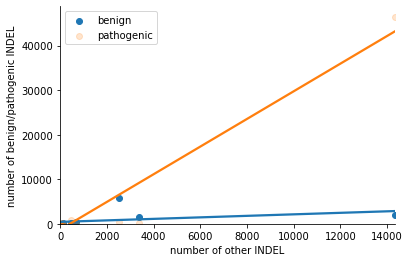

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter('other','benign',data=func_sta)
sns.regplot('other','benign',data=func_sta,order=1,ci=None,
                scatter=False)
plt.scatter('other','pathogenic',data=func_sta,alpha=0.2)
sns.regplot('other','pathogenic',data=func_sta,order=1,ci=None,
                scatter=False)
plt.legend(loc='upper left')
plt.ylabel('number of benign/pathogenic INDEL')
plt.xlabel('number of other INDEL')
plt.xlim(-1,)
plt.ylim(-1,)

sns.despine()

In [11]:
exon_func_sta=pd.concat([
    pd.DataFrame(f_train_data[f_train_data['tag']==0]['[4]ExonicFunc.refGene'].value_counts()),
    pd.DataFrame(f_train_data[f_train_data['tag']==1]['[4]ExonicFunc.refGene'].value_counts()),
    pd.DataFrame(f_train_data[f_train_data['tag']==-9]['[4]ExonicFunc.refGene'].value_counts()),
],axis=1)
exon_func_sta.columns=['benign','pathogenic','other']
for column in exon_func_sta.columns:
    exon_func_sta[column].fillna(0, inplace=True)
#exon_func_sta['all']=exonfunc_sta['benign']+func_sta['pathogenic']+func_sta['other']
#exon_func_sta

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


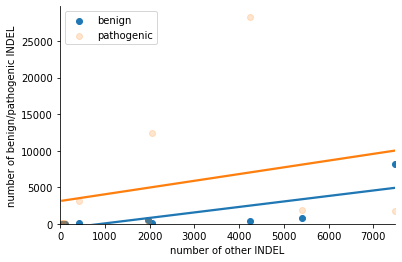

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter('other','benign',data=exon_func_sta)
sns.regplot('other','benign',data=exon_func_sta,order=1,ci=None,
                scatter=False,)
plt.scatter('other','pathogenic',data=exon_func_sta,alpha=0.2)
sns.regplot('other','pathogenic',data=exon_func_sta,order=1,ci=None,
                scatter=False,)
plt.legend(loc='upper left')
plt.ylabel('number of benign/pathogenic INDEL')
plt.xlabel('number of other INDEL')
plt.xlim(-1,)
plt.ylim(-1,)

sns.despine()

In [13]:
from statsmodels.formula.api import ols
lm = ols('benign ~ other ', data=func_sta).fit()
stud_res = lm.outlier_test()
dic_func_b = dict(zip(stud_res.index,stud_res['student_resid']))

lm = ols('pathogenic ~ other ', data=func_sta).fit()
stud_res = lm.outlier_test()
dic_func_p = dict(zip(stud_res.index,stud_res['student_resid']))

lm = ols('benign ~ other ', data=exon_func_sta).fit()
stud_res = lm.outlier_test()
dic_exon_func_b = dict(zip(stud_res.index,stud_res['student_resid']))

lm = ols('pathogenic ~ other ', data=exon_func_sta).fit()
stud_res = lm.outlier_test()
dic_exon_func_p = dict(zip(stud_res.index,stud_res['student_resid']))


In [23]:
dic_exon_func_p

{'.': -1.3365011843292725,
 'nonframeshift_deletion': -0.7130749684481075,
 'nonframeshift_insertion': -0.46602578357270974,
 'frameshift_deletion': 5.208232314205318,
 'frameshift_insertion': 0.783841722354187,
 'stopgain': -0.04357266115504085,
 'unknown': -0.3365015225510745,
 'stoploss': -0.3321567935443338,
 'startloss': -0.3255503535422757}

In [14]:
def func_replace(data):
    data['Func_b'] = data['Func'].replace(dic_func_b)
    data['Func_p'] = data['Func'].replace(dic_func_p)
    data['Func'] = data['Func'].replace(dict_gene1)
    data['ExonicFunc_b'] = data['ExonicFunc'].replace(dic_exon_func_b)
    data['ExonicFunc_p'] = data['ExonicFunc'].replace(dic_exon_func_p)
    data['ExonicFunc'] = data['ExonicFunc'].replace(dict_gene2)
    return data

In [18]:
dic_func_b

{'intronic': 17.153294118008795,
 'exonic': -3.3497813284563556,
 'UTR3': 0.36408057834156193,
 'UTR5': -0.10382972875548989,
 'ncRNA_intronic': -0.17096414841804902,
 'splicing': -0.21617738277150067,
 'ncRNA_exonic': -0.2653322372199965,
 'upstream': -0.2873872276683465,
 'downstream': -0.28075167593614025,
 'intergenic': -0.293112045027561,
 'UTR5;UTR3': -0.29617759958184553,
 'exonic;splicing': -0.2969925861651045,
 'upstream;downstream': -0.29594475343101384,
 'ncRNA_UTR5': -0.2980493305614511,
 'ncRNA_exonic;splicing': -0.2980493305614511}

### train

In [20]:
gnomad_b=pd.read_csv('/media/bgi/zhangtongda/bgi//zfssz2/ST_MCHRI/BIGDATA/USER/zhangtongda/ldfssz1_ztd_project/project/variang_predict2/INDEL_pred/train/gnomad_contr_low_af/gnomad_contr_low_af_train.csv',sep='\t',header=0)

In [22]:
gnomad_b = gnomad_b[['# [1]CHROM_[2]POS_[3]REF_[4]ALT',  '[9]Func.refGene',
       '[10]ExonicFunc.refGene', '[16]gnomAD_genome_ALL', '0', 
       'exonic', 'stream', 'intergenic', 'intronic', 'ncRNA', 'splicing',
       'UTR', 'frameshift_deletion', 'frameshift_insertion',
       'nonframeshift_deletion', 'nonframeshift_insertion', 'startloss',
       'stopgain', 'stoploss',  'exac_syn_z', 'exac_mis_z',
       'exac_lof_z', 'exac_pLI', 'exac_cnv_z', 
       'RVIS[pop_maf_0.05%(any)]', '%RVIS[pop_maf_0.05%(any)]',
        'OE-ratio_[ExAC v2]',
       '%OE-ratio_[ExAC v2]', 'alternative-RVIS[maf_0.0025%]',
       'alternative-%RVIS[maf_0.0025%]']]
gnomad_b.columns=rename_col
gnomad_b = func_replace(gnomad_b)
gnomad_b = gnomad_b.replace('.', np.nan)
for column in rename_col[1:]:
    gnomad_b[column] = pd.to_numeric(gnomad_b[column])
    gnomad_b[column].fillna(0, inplace=True)

In [23]:
save_data(gnomad_b,'gnomad_b.pkl')

In [16]:
data_dir='/media/bgi/zhangtongda/bgi//zfssz2/ST_MCHRI/BIGDATA/USER/zhangtongda/ldfssz1_ztd_project/project/variang_predict2/INDELpred_0124/train_test_data/'
train_data_f='fin_train_data.csv'
train_data=pd.read_csv(os.path.join(data_dir, train_data_f),sep='\t',header=0)
train_data = train_data.loc[train_data['[6]CLNSIG'].isin(tag_list),]
train_data.loc[train_data['[6]CLNSIG'].str.contains('athogenic'),'tag']=1
train_data.loc[train_data['[6]CLNSIG'].str.contains('enign'),'tag']=0 
train_data = train_data[columns_list+['tag','[7]CLNREVSTAT']]
train_data['[7]CLNREVSTAT'].replace(dict_CLNREVSTAT, inplace=True)
train_data.columns=rename_col+['tag','st ar']
train_data = func_replace(train_data)
train_data = train_data.replace('.', np.nan)

for column in rename_col[1:]:
    train_data[column] = pd.to_numeric(train_data[column])
    train_data[column].fillna(0, inplace=True)


In [17]:
# x_train=
x_train = train_data.iloc[:,1:]
y_train = train_data['tag']
x_train  = x_train.drop(['tag','star'], axis=1) 
save_data([x_train,y_train],'train_data_statistics.pkl')

In [3]:
gnomad_b = load_data('gnomad_b.pkl')
x_train,y_train=load_data('train_data_statistics.pkl')

In [4]:
ratio=1
int(y_train[y_train==1].shape[0]*ratio)-y_train[y_train==0].shape[0]

38043

In [8]:
ratio=1
from sklearn.utils import resample
gnomad_train = resample(gnomad_b.iloc[:,1:], n_samples=(int(y_train[y_train==1].shape[0]*ratio)-y_train[y_train==0].shape[0]),
                                                        random_state=123).reset_index()
x_train_merge = pd.concat([x_train,gnomad_train.iloc[:,1:]],axis=0)
y_train_merge = pd.concat([y_train,pd.DataFrame([0]*gnomad_train.shape[0])[0]],axis=0)

In [9]:
save_data([x_train_merge,y_train_merge],'train_merge_data_statistics.pkl')

### test1

In [17]:
data_dir='/media/bgi/zhangtongda/bgi//zfssz2/ST_MCHRI/BIGDATA/USER/zhangtongda/ldfssz1_ztd_project/project/variang_predict2/INDELpred_0124/train_test_data/'
test1_data_f='fin_test1_data.csv'
test1_data=pd.read_csv(os.path.join(data_dir, test1_data_f),sep='\t',header=0)
test1_data = test1_data.loc[test1_data['[6]CLNSIG'].isin(tag_list),]
test1_data.loc[test1_data['[6]CLNSIG'].str.contains('athogenic'),'tag']=1
test1_data.loc[test1_data['[6]CLNSIG'].str.contains('enign'),'tag']=0 
test1_data = test1_data[columns_list+['tag','[7]CLNREVSTAT']]
test1_data['[7]CLNREVSTAT'].replace(dict_CLNREVSTAT, inplace=True)
test1_data.columns=rename_col+['tag','star']
test1_data = func_replace(test1_data)
test1_data = test1_data.replace('.', np.nan)

for column in rename_col[1:]:
    test1_data[column] = pd.to_numeric(test1_data[column])
    test1_data[column].fillna(0, inplace=True)


In [18]:
x_test1 = test1_data.iloc[:,1:]
y_test1 = test1_data['tag']
test1_star = test1_data['star']
x_test1  = x_test1.drop(['tag','star'], axis=1) 
save_data([x_test1,y_test1,test1_star],'test1_data_statistics.pkl')

In [27]:
save_data(test1_data['INDEL_index'],'test1_data_id.pkl')
save_data([y_test1,test1_star],'y_test1_star.pkl')


In [31]:
save_data(x_test1['gnomad_genome_controls_AF_popmax'],'x_test1_af.pkl')

In [35]:
data_dir='/media/bgi/zhangtongda/bgi//zfssz2/ST_MCHRI/BIGDATA/USER/zhangtongda/ldfssz1_ztd_project/project/variang_predict2/INDELpred_0124/train_test_data/'
test1_data_f='fin_test1_data.csv'
test1_data=pd.read_csv(os.path.join(data_dir, test1_data_f),sep='\t',header=0)
test1_data = test1_data.loc[test1_data['[6]CLNSIG'].isin(tag_list),]
# test1_data
save_data(test1_data['[9]Func.refGene'],'x_test1_func.pkl')
save_data(test1_data['[10]ExonicFunc.refGene'],'x_test1_exonic_func.pkl')

In [39]:
save_data(test1_data['0'],'x_test1_length.pkl')

### test1 VUS

In [37]:
data_dir='/media/bgi/zhangtongda/bgi//tfs11/ST_MCHRI_BIGDATA/zhangtongda/from_zfssz2_project/project/variang_predict2/INDELpred_0124/train_test_data/'
test1_data_f='fin_test1_data.csv'
test1_data=pd.read_csv(os.path.join(data_dir, test1_data_f),sep='\t',header=0)

In [50]:
test1_vus = test1_data[test1_data['[6]CLNSIG']=='Uncertain_significance']
test1_vus = test1_vus[columns_list]
test1_vus.columns=rename_col
test1_vus = func_replace(test1_vus)
test1_vus = test1_vus.replace('.', np.nan)

for column in rename_col[1:]:
    test1_vus[column] = pd.to_numeric(test1_vus[column])
    test1_vus[column].fillna(0, inplace=True)


In [52]:
save_data(test1_vus,'test1_vus.pkl')

### test2

In [54]:
test2_data_f='fin_test2_data.csv'
test2_data=pd.read_csv(os.path.join(data_dir, test2_data_f),sep='\t',header=0)

test2_data = test2_data.loc[test2_data['[6]VKGL_clf'].isin(['LB','LP']),]
test2_data.loc[test2_data['[6]VKGL_clf'].str.contains('LB'),'tag']=0
test2_data.loc[test2_data['[6]VKGL_clf'].str.contains('LP'),'tag']=1 
test2_data = test2_data[columns_list+['tag','[7]VKGL_supp']]
test2_data['[7]VKGL_supp'].replace({'1 lab':1}, inplace=True)
test2_data.columns=rename_col+['tag','lab']
test2_data = func_replace(test2_data)
test2_data = test2_data.replace('.', np.nan)

for column in rename_col[1:]:
    test2_data[column] = pd.to_numeric(test2_data[column])
    test2_data[column].fillna(0, inplace=True)
    
dup_id=pd.read_csv(os.path.join(data_dir, 'fin_test2_data.csv.dup_id'),sep='\t',header=None)
test2_data = test2_data[~test2_data['INDEL_index'].isin(dup_id[0].to_list())]

In [55]:
x_test2 = test2_data.iloc[:,1:]
y_test2 = test2_data['tag']
test2_lab = test2_data['lab']
x_test2  = x_test2.drop(['tag','lab'], axis=1) 
save_data([x_test2,y_test2,test2_lab],'test2_data_statistics.pkl')

In [56]:
save_data(test2_data['INDEL_index'],'test2_data_id.pkl')
save_data([y_test2,test2_lab],'y_test2_lab.pkl')


### test3

In [170]:
test3_data_f = 'fin_test3_data.csv'
test3_data=pd.read_csv(os.path.join(data_dir, test3_data_f),sep='\t',header=0)

In [175]:
test3_data_copy=test3_data.copy()
test3_data_copy

,# [1]CHROM_[2]POS_[3]REF_[4]ALT,[5]ID,[6]Gene.refGene,[7]Func.refGene,[8]ExonicFunc.refGene,[9]controls_AF_popmax,0,#gene,exonic,stream,...,exac_cnv_z,CCDSr20,%geneCov,RVIS[pop_maf_0.05%(any)],%RVIS[pop_maf_0.05%(any)],Edge_case_RVIS[pop_maf_0.05%(any)],OE-ratio_[ExAC v2],%OE-ratio_[ExAC v2],alternative-RVIS[maf_0.0025%],alternative-%RVIS[maf_0.0025%]
0,chr1_10403_ACCCTAACCCTAACCCTAACCCTAACCCTAACCCT...,.,NONE;DDX11L1,intergenic,.,0.2284,-37,.,.,.,...,.,.,.,.,.,.,.,.,.,.
1,chr1_10409_ACCCTAACCCTAACCCTAACCCTAACCCTAAC_A,.,NONE;DDX11L1,intergenic,.,0.0533,-31,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,chr1_10415_ACCCTAACCCTAACCCTAACCCTAAC_A,.,NONE;DDX11L1,intergenic,.,0.0745,-25,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,chr1_10439_AC_A,rs112766696,NONE;DDX11L1,intergenic,.,0.2788,-1,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4,chr1_10616_CCGCCGTTGCAAAGGCGCGCCG_C,rs376342519,NONE;DDX11L1,intergenic,.,0.9655,-21,.,.,.,...,.,.,.,.,.,.,.,.,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039043,chrUn_gl000248_37451_CAAA_C,.,NONE;NONE,intergenic,.,.,-3,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4039044,chrUn_gl000248_38372_C_CTA,.,NONE;NONE,intergenic,.,.,2,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4039045,chrUn_gl000249_16222_GAGAA_G,.,NONE;NONE,intergenic,.,.,-4,.,.,.,...,.,.,.,.,.,.,.,.,.,.
4039046,chrUn_gl000249_16303_GAGGA_G,.,NONE;NONE,intergenic,.,.,-4,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [178]:
test3_data = test3_data_copy.copy()
test3_data = test3_data[['# [1]CHROM_[2]POS_[3]REF_[4]ALT',  '[7]Func.refGene',
       '[8]ExonicFunc.refGene', '[9]controls_AF_popmax', '0', 
       'exonic', 'stream', 'intergenic', 'intronic', 'ncRNA', 'splicing',
       'UTR', 'frameshift_deletion', 'frameshift_insertion',
       'nonframeshift_deletion', 'nonframeshift_insertion', 'startloss',
       'stopgain', 'stoploss',  'exac_syn_z', 'exac_mis_z',
       'exac_lof_z', 'exac_pLI', 'exac_cnv_z', 
       'RVIS[pop_maf_0.05%(any)]', '%RVIS[pop_maf_0.05%(any)]',
        'OE-ratio_[ExAC v2]',
       '%OE-ratio_[ExAC v2]', 'alternative-RVIS[maf_0.0025%]',
       'alternative-%RVIS[maf_0.0025%]']]
test3_data.columns=rename_col
test3_data = func_replace(test3_data)
# test3_data = test3_data.replace('.', np.nan)

# for column in rename_col[1:]:
#     test3_data[column] = pd.to_numeric(test3_data[column])
#     test3_data[column].fillna(0, inplace=True)

In [179]:
test3_data

,INDEL_index,Func,ExonicFunc,gnomad_genome_controls_AF_popmax,length,exonic,stream,intergenic,intronic,ncRNA,...,RVIS_pop_maf_0_05,p_RVIS_pop_maf_0_05,OE-ratio_ExAC_v2,p_OE-ratio_ExAC_v2,alternative-RVIS_maf_0_0025,alternative-p_RVIS_maf_0_0025,Func_b,Func_p,ExonicFunc_b,ExonicFunc_p
0,chr1_10403_ACCCTAACCCTAACCCTAACCCTAACCCTAACCCT...,6.0,12,0.2284,-37,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
1,chr1_10409_ACCCTAACCCTAACCCTAACCCTAACCCTAAC_A,6.0,12,0.0533,-31,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
2,chr1_10415_ACCCTAACCCTAACCCTAACCCTAAC_A,6.0,12,0.0745,-25,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
3,chr1_10439_AC_A,6.0,12,0.2788,-1,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
4,chr1_10616_CCGCCGTTGCAAAGGCGCGCCG_C,6.0,12,0.9655,-21,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039043,chrUn_gl000248_37451_CAAA_C,6.0,12,.,-3,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
4039044,chrUn_gl000248_38372_C_CTA,6.0,12,.,2,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
4039045,chrUn_gl000249_16222_GAGAA_G,6.0,12,.,-4,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501
4039046,chrUn_gl000249_16303_GAGGA_G,6.0,12,.,-4,.,.,.,.,.,...,.,.,.,.,.,.,-0.293112,0.351706,32.334182,-1.336501


In [181]:
test3_data = test3_data.replace('.', np.nan)
for column in rename_col[1:]:
    test3_data[column] = pd.to_numeric(test3_data[column])
    test3_data[column].fillna(0, inplace=True)

In [207]:
Ppositive_id = ['chr1_150469350_C_CA','chr12_56398689_ATTGT_A','chr1_43394940_GC_G','chr15_93545433_G_GA','chr16_2135249_T_TC','chr16_29825015_G_GC','chr16_29825705_CG_C','chr16_29825914_TC_T','chr16_31120700_C_CTT','chr16_56385305_C_CACG','chr17_2577578_CT_C','chr17_2583499_T_TG','chr20_62039819_C_CCG','chr2_166848245_AGTTT_A','chr2_166848369_CAA_C','chr22_51159361_GC_G','chr3_132384870_GT_G','chr5_125887729_TAGAG_T','chr8_41791747_CCT_C','chr9_130438142_CGT_C','chr9_135776163_AGAACC_A','chr9_135781073_GCTTT_G','chr9_135781373_AC_A','chrX_18622179_CTGCA_C','chrX_48932539_CAT_C','chrX_53426627_GAGTCTTCTGATTCTCA_G']
y_test3 = (test3_data['INDEL_index'].isin(Ppositive_id)== True).astype('int')

In [208]:
x_test3 = test3_data.iloc[:,1:]
save_data([x_test3,y_test3],'test3_data_statistics.pkl')

In [185]:
x_test3

,Func,ExonicFunc,gnomad_genome_controls_AF_popmax,length,exonic,stream,intergenic,intronic,ncRNA,splicing,...,RVIS_pop_maf_0_05,p_RVIS_pop_maf_0_05,OE-ratio_ExAC_v2,p_OE-ratio_ExAC_v2,alternative-RVIS_maf_0_0025,alternative-p_RVIS_maf_0_0025,Func_b,Func_p,ExonicFunc_b,ExonicFunc_p
0,6.0,12,0.2284,-37,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
1,6.0,12,0.0533,-31,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
2,6.0,12,0.0745,-25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
3,6.0,12,0.2788,-1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
4,6.0,12,0.9655,-21,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039043,6.0,12,0.0000,-3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
4039044,6.0,12,0.0000,2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
4039045,6.0,12,0.0000,-4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
4039046,6.0,12,0.0000,-4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.293112,0.351706,32.334182,-1.336501
